## Clean the test dataset

In [369]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [370]:
X = pd.read_csv("housing_test_x.csv")
Y = pd.read_csv("housing_test_y.csv")

In [371]:
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [372]:
Y.head()

,Id,SalePrice
0,1461,120376.994315
1,1462,152387.635505
2,1463,185025.193763
3,1464,198385.651258
4,1465,185934.885245


In [373]:
Y.isnull().sum()

Id           0
SalePrice    0
dtype: int64

In [374]:
data=X.copy()
data['SalePrice']=Y['SalePrice']
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,120376.994315
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,152387.635505
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,185025.193763
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,198385.651258
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,185934.885245


In [375]:
data.shape

(1459, 81)

In [376]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [377]:
data.isnull().sum(axis=0)

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [378]:
data.isnull().sum(axis=0).sum()

7000

###  clean the test data: training data and test data must  have the same columns (same names, same order) <br>
training data is `data_clean` in house_price_data_clean_train.ipynb <br>
Do NOT change anything in house_price_data_clean_train.ipynb <br>
test data is the `data_clean` in this file, i.e., the clean version of `data` in this file <br>
Your task is to obtain `data_clean` by cleaning the `data` in this file <br>
Only use "Method 2" to impute the missing values

In [379]:
# Only show the columns with missing values
Missing = data.isnull().sum(axis=0)
Missing[Missing > 0], Missing[Missing > 0].shape

(MSZoning           4
 LotFrontage      227
 Alley           1352
 Utilities          2
 Exterior1st        1
 Exterior2nd        1
 MasVnrType        16
 MasVnrArea        15
 BsmtQual          44
 BsmtCond          45
 BsmtExposure      44
 BsmtFinType1      42
 BsmtFinSF1         1
 BsmtFinType2      42
 BsmtFinSF2         1
 BsmtUnfSF          1
 TotalBsmtSF        1
 BsmtFullBath       2
 BsmtHalfBath       2
 KitchenQual        1
 Functional         2
 FireplaceQu      730
 GarageType        76
 GarageYrBlt       78
 GarageFinish      78
 GarageCars         1
 GarageArea         1
 GarageQual        78
 GarageCond        78
 PoolQC          1456
 Fence           1169
 MiscFeature     1408
 SaleType           1
 dtype: int64,
 (33,))

In [380]:
# Get the percent of missing values in each column
data_missing = (data.isnull().sum(axis=0) / data.shape[0]) * 100
data_missing

Id                0.000000
MSSubClass        0.000000
MSZoning          0.274160
LotFrontage      15.558602
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.068540
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [381]:
# Get the columns with no missing values
data_missing[data_missing == 0].index

Index(['Id', 'MSSubClass', 'LotArea', 'Street', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond',
       'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [382]:
# Remove columns with no missing values from data_missing
data_missing = data_missing.drop(data_missing[data_missing == 0].index)
data_missing

MSZoning         0.274160
LotFrontage     15.558602
Alley           92.666210
Utilities        0.137080
Exterior1st      0.068540
Exterior2nd      0.068540
MasVnrType       1.096642
MasVnrArea       1.028101
BsmtQual         3.015764
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtFinType1     2.878684
BsmtFinSF1       0.068540
BsmtFinType2     2.878684
BsmtFinSF2       0.068540
BsmtUnfSF        0.068540
TotalBsmtSF      0.068540
BsmtFullBath     0.137080
BsmtHalfBath     0.137080
KitchenQual      0.068540
Functional       0.137080
FireplaceQu     50.034270
GarageType       5.209047
GarageYrBlt      5.346127
GarageFinish     5.346127
GarageCars       0.068540
GarageArea       0.068540
GarageQual       5.346127
GarageCond       5.346127
PoolQC          99.794380
Fence           80.123372
MiscFeature     96.504455
SaleType         0.068540
dtype: float64

In [383]:
data_missing.shape

(33,)

In [384]:
# Sort the missing data in descending order
data_missing = data_missing.sort_values(ascending=False)
data_missing

PoolQC          99.794380
MiscFeature     96.504455
Alley           92.666210
Fence           80.123372
FireplaceQu     50.034270
LotFrontage     15.558602
GarageCond       5.346127
GarageYrBlt      5.346127
GarageQual       5.346127
GarageFinish     5.346127
GarageType       5.209047
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtQual         3.015764
BsmtFinType1     2.878684
BsmtFinType2     2.878684
MasVnrType       1.096642
MasVnrArea       1.028101
MSZoning         0.274160
BsmtFullBath     0.137080
BsmtHalfBath     0.137080
Functional       0.137080
Utilities        0.137080
GarageCars       0.068540
GarageArea       0.068540
TotalBsmtSF      0.068540
KitchenQual      0.068540
BsmtUnfSF        0.068540
BsmtFinSF2       0.068540
BsmtFinSF1       0.068540
Exterior2nd      0.068540
Exterior1st      0.068540
SaleType         0.068540
dtype: float64

Text(0.5, 1.0, 'Columns With Missing Data')

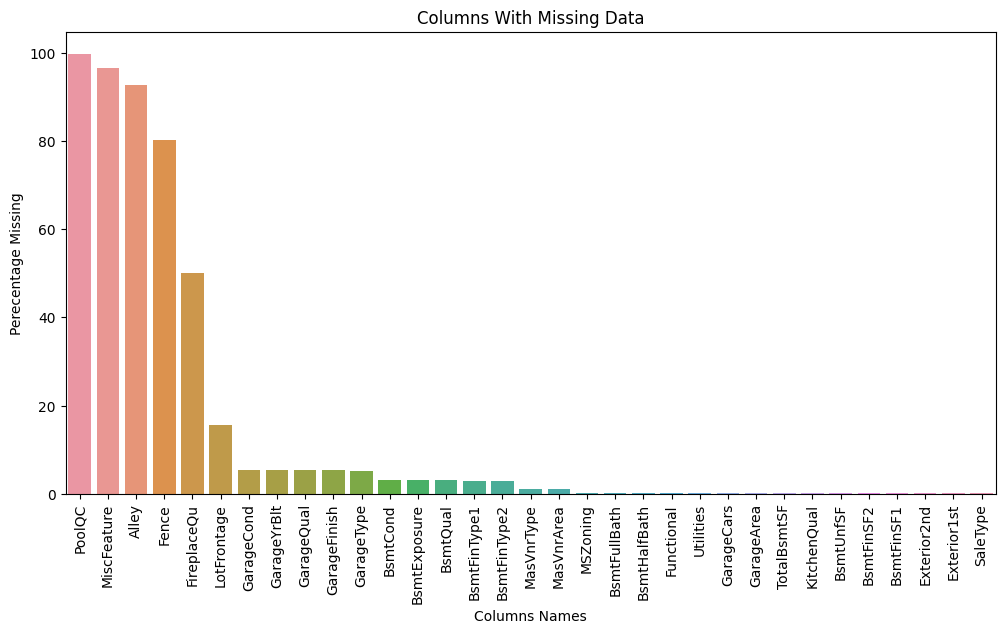

In [385]:
# Plot the missing values
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.barplot(x=data_missing.index, y=data_missing)
plt.xlabel("Columns Names")
plt.ylabel("Perecentage Missing")
plt.title("Columns With Missing Data")

In [386]:
# Columns with over 50% missing values
bad_column_names = data_missing[data_missing >= 55].index
bad_column_names

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], dtype='object')

In [387]:
# Drop the columns with over 50% missing data
data_new = data.drop(columns=bad_column_names.append(pd.Index(['MasVnrType'])), axis=1) # MasVnrType was deleted in train
# data_new = data.drop(columns=bad_column_names, axis=1)
data_new.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,0,6,2010,WD,Normal,120376.994315
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,12500,6,2010,WD,Normal,152387.635505
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,Normal,185025.193763
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2010,WD,Normal,198385.651258
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,0,0,144,0,0,1,2010,WD,Normal,185934.885245


In [388]:
# Clean the data by imputing the missing vaues
# Use either an estimation, mean, median, or most frequent, or add a new category 'nothing'
to_be_cleaned_column_names = data_missing[data_missing < 55].index.drop('MasVnrType')
to_be_cleaned_column_names, to_be_cleaned_column_names.shape

(Index(['FireplaceQu', 'LotFrontage', 'GarageCond', 'GarageYrBlt', 'GarageQual',
        'GarageFinish', 'GarageType', 'BsmtCond', 'BsmtExposure', 'BsmtQual',
        'BsmtFinType1', 'BsmtFinType2', 'MasVnrArea', 'MSZoning',
        'BsmtFullBath', 'BsmtHalfBath', 'Functional', 'Utilities', 'GarageCars',
        'GarageArea', 'TotalBsmtSF', 'KitchenQual', 'BsmtUnfSF', 'BsmtFinSF2',
        'BsmtFinSF1', 'Exterior2nd', 'Exterior1st', 'SaleType'],
       dtype='object'),
 (28,))

In [389]:
for c in to_be_cleaned_column_names:
    v = data_new[c] # get values in this column
    v_valid = v[~v.isnull()] # get valid values (non-null values)
    if data_new[c].dtype == np.dtype('O'): # non-numerical values
        data_new[c] = data_new[c].fillna(v.value_counts().index[0]) # get the most frequent category
        # data_new[c] = data_new[c].fillna('nothing') replace nan with 'nothing'
    else: # numerical values
        data_new[c] = data_new[c].fillna(v_valid.median()) # replace nan values with median

In [390]:
# Check for missing values again
data_new.isnull().sum().sum()

0

### Data preprocessing for machine learning

convert categorical values to numerical values using one-hot encoding

In [391]:
# Get the categorical data columns
categorical_column = []
for c in data_new.columns:
    if data_new[c].dtype == np.dtype('O'): # non-numerical values
        categorical_column.append(c)
len(categorical_column), categorical_column

(38,
 ['MSZoning',
  'Street',
  'LotShape',
  'LandContour',
  'Utilities',
  'LotConfig',
  'LandSlope',
  'Neighborhood',
  'Condition1',
  'Condition2',
  'BldgType',
  'HouseStyle',
  'RoofStyle',
  'RoofMatl',
  'Exterior1st',
  'Exterior2nd',
  'ExterQual',
  'ExterCond',
  'Foundation',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinType2',
  'Heating',
  'HeatingQC',
  'CentralAir',
  'Electrical',
  'KitchenQual',
  'Functional',
  'FireplaceQu',
  'GarageType',
  'GarageFinish',
  'GarageQual',
  'GarageCond',
  'PavedDrive',
  'SaleType',
  'SaleCondition'])

In [392]:
data_new.shape

(1459, 76)

In [393]:
# Make the one-hot-encoding columns
data_clean = pd.get_dummies(data_new, columns=categorical_column)
data_clean.shape

(1459, 257)

In [394]:
# Check for missing values again
data_clean.isnull().sum().sum()

0

In [395]:
data_clean.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,0,0,1,0,0,0,0,1,0


In [396]:
data_clean.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=257)

Text(0.5, 1.0, 'Histogram if SalePrice in test set')

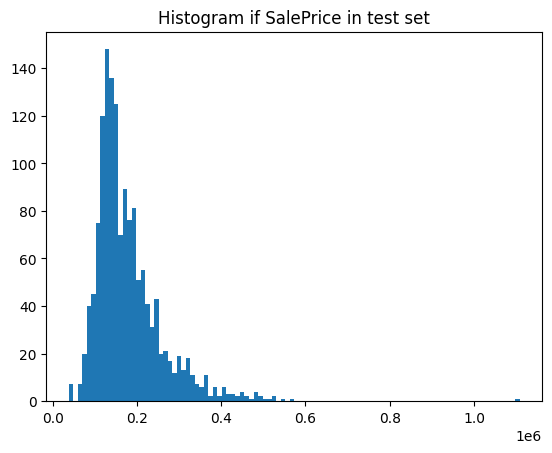

In [397]:
fig, ax = plt.subplots()
ax.hist(data_clean['SalePrice'].values, bins=100);
ax.set_title("Histogram if SalePrice in test set")

In [398]:
# Drop the 'Id' column
data_clean.drop(['Id'], axis=1, inplace=True)

In [399]:
data_clean.shape

(1459, 256)

### Add missing columns to  `data_clean` if necessary
`data_clean` for training has N columns (see house_price_data_clean_train.ipynb) <br>
`data_clean` for testing (this file) now may have < N columns, i.e., missing some columns <br>
if it happens, then find the missing column names, and add those to `data_clean` in this file, and the values in these columns are 0s

In [400]:
data_train_clean = pd.read_csv("housing_train_clean.csv")
print("data_train_clean.shape", data_train_clean.shape)

data_train_clean.shape (1460, 272)


In [401]:
data_clean.columns.shape, data_train_clean.columns.shape

((256,), (272,))

In [402]:
same_columns = np.intersect1d(data_train_clean.columns, data_clean.columns)
same_columns.shape

(256,)

In [403]:
# numpy.setdiff1d(ar1, ar2) returns the unique values in ar1 that are NOT in ar2
columns_not_in_test = np.setdiff1d(data_train_clean.columns, data_clean.columns)
columns_not_in_test.shape, columns_not_in_test

((16,),
 array(['Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn',
        'Electrical_Mix', 'Exterior1st_ImStucc', 'Exterior1st_Stone',
        'Exterior2nd_Other', 'GarageQual_Ex', 'Heating_Floor',
        'Heating_OthW', 'HouseStyle_2.5Fin', 'RoofMatl_ClyTile',
        'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
        'Utilities_NoSeWa'], dtype=object))

In [404]:
for c in columns_not_in_test:
    data_clean[c] = 0

In [405]:
data_clean.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'Exterior2nd_Other', 'GarageQual_Ex', 'Heating_Floor', 'Heating_OthW',
       'HouseStyle_2.5Fin', 'RoofMatl_ClyTile', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'Utilities_NoSeWa'],
      dtype='object', length=272)

### Save the `clean_data` to the file "housing_test_clean.csv"

In [406]:
# Sort the columns by name so both the train and test data have the same order of columns
data_clean = data_clean.reindex(sorted(data_clean.columns), axis=1)
data_clean.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BldgType_1Fam',
       'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'BsmtCond_Fa',
       ...
       'Street_Grvl', 'Street_Pave', 'TotRmsAbvGrd', 'TotalBsmtSF',
       'Utilities_AllPub', 'Utilities_NoSeWa', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold'],
      dtype='object', length=272)

In [407]:
(data_train_clean.columns==data_clean.columns).sum() != len(data_clean.columns)

False

In [408]:
# Final check for null values
data_clean.isnull().sum().sum()

0

In [410]:
# Save file to .csv
data_clean.to_csv("housing_test_clean.csv", index=False)

In [411]:
data_clean.shape

(1459, 272)